In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
# EDA
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(15936, 31)

In [ ]:
fraud = df[df['Class']==1]
valid= df[df['Class']==0]

In [ ]:
print('Fraud Cases : {}'.format(len(df[df['Class']==1])))
print('ValidTransactions : {}'.format(len(df[df['Class']==0])))

Fraud Cases : 73
ValidTransactions : 15862


In [ ]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
valid.Amount.describe()

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
#Visualization

<Axes: >

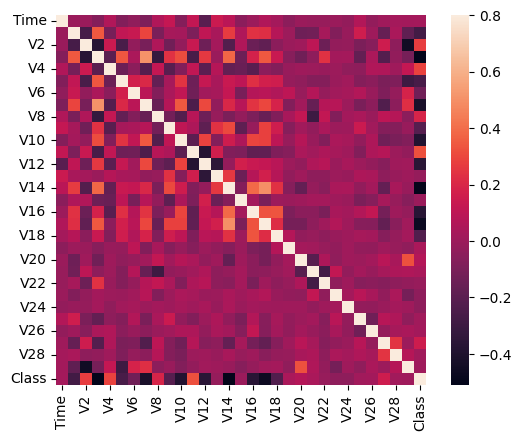

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat,vmax = .8,square = True)

<Axes: xlabel='Class', ylabel='Amount'>

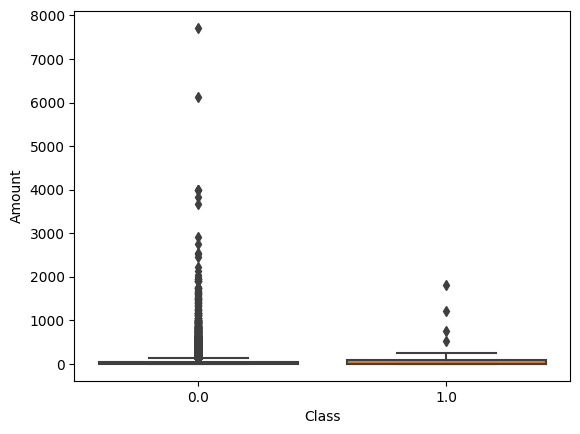

In [ ]:
sns.boxplot(x = "Class",y = "Amount", data = df)

<Axes: xlabel='Amount', ylabel='Count'>

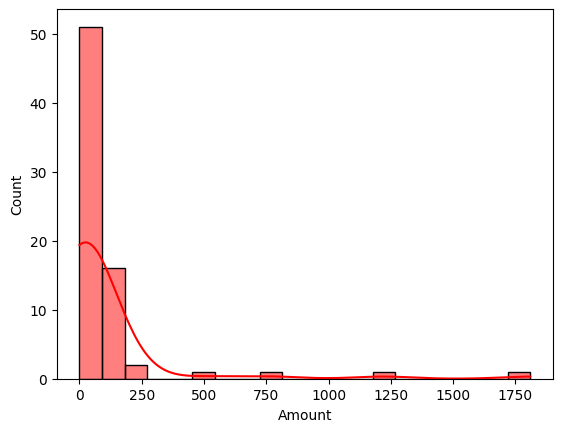

In [ ]:
sns.histplot(df[df.Class ==1].Amount,bins = 20, kde = True, color = 'red')

<Axes: xlabel='Time', ylabel='Class'>

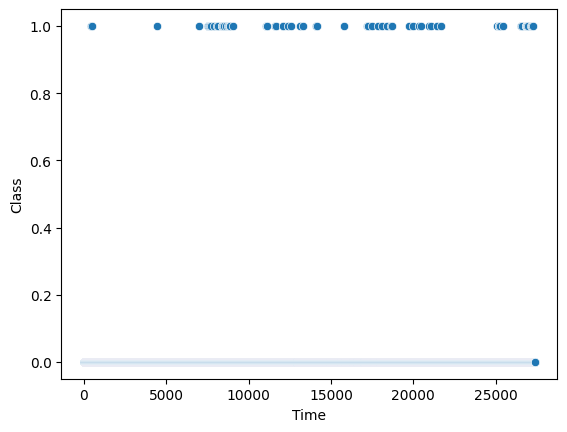

In [ ]:
sns.scatterplot(x = "Time", y = "Class", data = df)

In [ ]:
df.duplicated().sum()

53

In [ ]:
df_train = df
y = df['Class']
X = df_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)

scaled_X = pd.DataFrame(scaled_data, columns=X.columns)


In [ ]:
normal = scaled_X[scaled_X['Class']==0]
fraud = scaled_X[scaled_X['Class']==1]
normal_sample = normal.sample(n=473)
df = pd.concat([normal_sample,fraud], axis=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4738,0.152789,0.871585,0.722025,0.912455,0.133279,0.490692,0.554135,0.432524,0.601049,0.561266,...,0.342344,0.743473,0.667905,0.185871,0.553166,0.237856,0.499921,0.392446,0.014702,0.0
1110,0.031493,0.975186,0.747549,0.871033,0.375248,0.487527,0.504243,0.445513,0.573519,0.377562,...,0.338362,0.679612,0.656321,0.475345,0.634673,0.219164,0.510216,0.425379,0.000130,0.0
13044,0.836908,0.975907,0.736834,0.875163,0.310971,0.479725,0.508832,0.433780,0.577759,0.484698,...,0.332238,0.631992,0.656328,0.401310,0.600878,0.482615,0.501299,0.421628,0.004126,0.0
8250,0.404150,0.941578,0.753967,0.901462,0.387766,0.489886,0.522260,0.443794,0.578899,0.473067,...,0.334394,0.682213,0.660925,0.411909,0.501173,0.174935,0.522511,0.443651,0.000257,0.0
12535,0.801505,0.972791,0.741069,0.890247,0.395859,0.478583,0.514085,0.434414,0.579986,0.492823,...,0.329938,0.631140,0.656958,0.479392,0.622728,0.191598,0.508346,0.424278,0.002228,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,0.985021,0.168513,0.979946,0.069268,0.668670,0.222792,0.422406,0.155258,0.958758,0.189523,...,0.388405,0.525717,0.632713,0.427805,0.699442,0.230025,0.597364,0.475747,0.012965,1.0
15736,0.992401,0.146201,0.984958,0.051951,0.670377,0.216150,0.421571,0.150488,0.969069,0.190987,...,0.388514,0.521417,0.631546,0.428517,0.703452,0.230139,0.595988,0.474821,0.012965,1.0
15751,0.993278,0.123890,0.989971,0.034634,0.672083,0.209508,0.420736,0.145718,0.979380,0.192453,...,0.388621,0.517117,0.630376,0.429230,0.707461,0.230253,0.594613,0.473894,0.012965,1.0
15781,0.994447,0.101580,0.994985,0.017317,0.673788,0.202864,0.419902,0.140949,0.989690,0.193918,...,0.388728,0.512818,0.629206,0.429944,0.711470,0.230367,0.593240,0.472965,0.012965,1.0


In [ ]:
y = df['Class']
df.drop('Class', axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Rgression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
# Initialize the LogisticRegression model
model = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Support Vector Machines.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC

In [ ]:
 svm = SVC()
model3=svm.fit(X_train,y_train)
y_pred3=model3.predict(X_test)


print(f'classification report :{classification_report(y_test,y_pred3)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred3)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred3)}')

classification report :              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        89
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

*************************************
confusion matrix :[[89  0]
 [ 0 21]]
*************************************
accuracy score :1.0
